# Hand Written digits project

Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
from google.colab import files


DownLoading and Processing Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Building Of CNN Model

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train the Model

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 54ms/step - accuracy: 0.8566 - loss: 0.4596 - val_accuracy: 0.9807 - val_loss: 0.0641
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step - accuracy: 0.9818 - loss: 0.0563 - val_accuracy: 0.9877 - val_loss: 0.0416
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.9871 - loss: 0.0392 - val_accuracy: 0.9895 - val_loss: 0.0392
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9908 - loss: 0.0295 - val_accuracy: 0.9900 - val_loss: 0.0360
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.9928 - loss: 0.0229 - val_accuracy: 0.9913 - val_loss: 0.0325


Evaluate the Model Performance

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9889 - loss: 0.0319
Test accuracy: 0.9913


Visulize Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


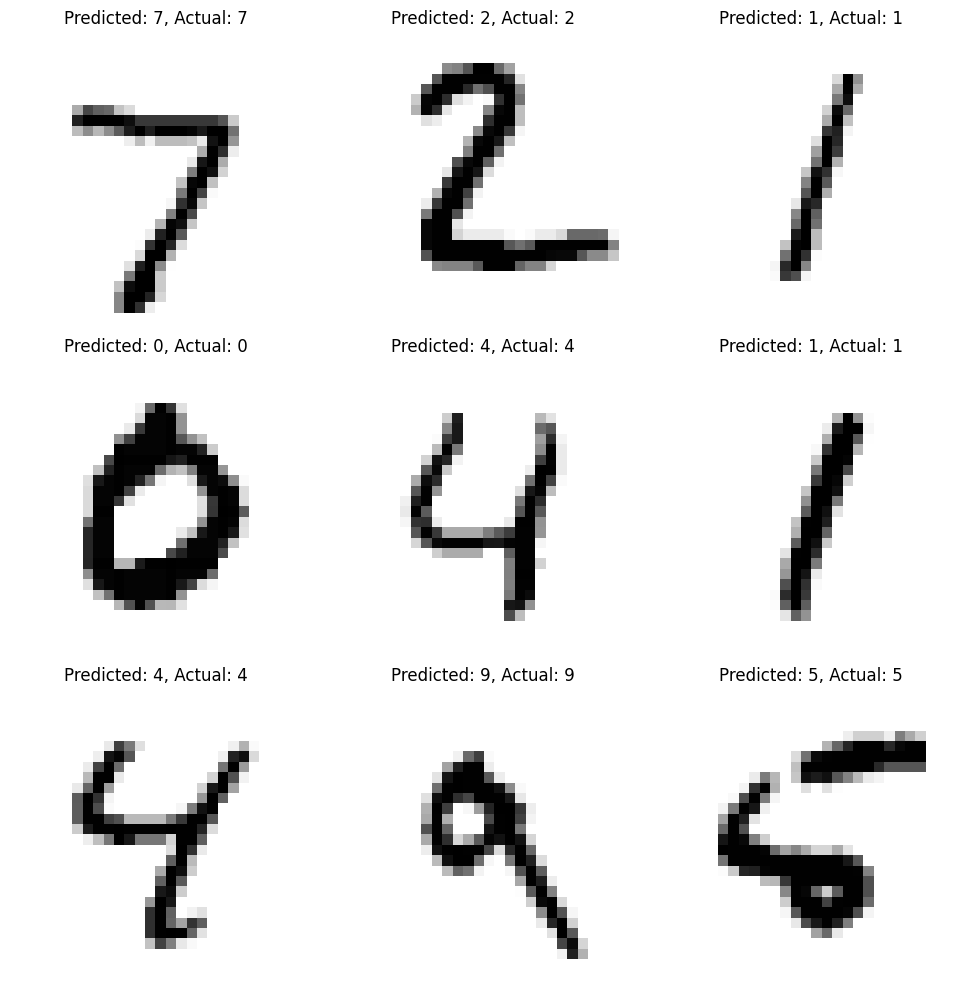

In [6]:
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {test_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()



Save and Load the Model

In [7]:
model.save("handwriting_cnn_model.h5")
loaded_model = load_model("handwriting_cnn_model.h5")

File and docunment Handwritten image

In [8]:
def predict_custom_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        image = Image.open(filename).convert('L')
        image = image.resize((28, 28))
        image = np.array(image).astype('float32') / 255.0
        image = image.reshape((1, 28, 28, 1))
        prediction = model.predict(image)
        print(f'Predicted digit: {np.argmax(prediction)}')

predict_custom_image()


Saving FK0FB.png to FK0FB.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted digit: 0
